# Modelling Easter Island (based on Brander&Taylor, 1998) 

This notebook traces some of the steps that are made in the article: "The simple economics of Easter Island - A Ricardo-Malthus model of renewable resource use" by Brander & Taylor (1998).

Misha Velthuis, 16 Nov 2018

First, see below equation 1 (Brander & Taylor, p.12):

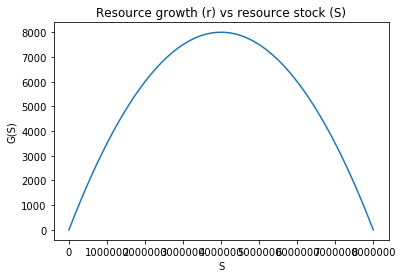

In [1]:
import numpy as np
import matplotlib.pyplot as plt

K=8*10**6 #Carying capacity
S=np.arange(0,K,10)

r=0.004 #regeneration

Gs=r*S*(1-(S/K))

#plotting
plt.plot(S,Gs)
plt.xlabel('S')
plt.ylabel('G(S)')
plt.title('Resource growth (r) vs resource stock (S)')
plt.show()

### Deducing function 4  (price producers charge for harvesting one unit S)
- __a__ (not to be confused with __α__) is the "unit labor requirement", which states how many units of labor is required for one unit of harvest
    - __a=L<sub>H</sub>/H<sup>P</sup>__  
- If you replace the denominator of this function with function 3 (p. 123) __H<sup>p</sup> = α.S.L__ then you get:
    - __a = L<sub>H</sub>/α.S.L = 1/(α.S)__
- So that's how many units of labour you need for harvesting one unit of resource.
- Given that the price of of one unit labor is w (=1M), the price of one unit of harvest is __w/(α.S)__



### Deducing function 6 (amount of H people will demand, given a certain price)
- Everyone has one unit of labor, for which everyone gets wage __w__ (1 M)
- People maximise their utility __u__ by dividing their wage __w__ over __h__ and __m__ (per capita consumption of __H__ and __M__)
- __u = h<sup>β</sup>m<sup>1-β</sup>__  
- The population as a whole will spend __β.w.L__ on H. For that, it can buy __β.w.L/p__ units of resource.

### Combining two points above

At a certain S, the harvest has a certain price, and at that price there is a certain demand. That's the amount that will be harvested (assuming a perfect market).

- __H<sup>D</sup>=w.β.L.p<sup>-1</sup>__  
- __p=w.(α.S)<sup>-1</sup>__  

Putting these two functions together:

- __H=w.β.L.(w.(α.S)<sup>-1</sup>)<sup>-1</sup>__  
- __H=w.β.L.(α.S.(w)<sup>-1</sup>)__  
- __H=w.β.L.S*α.w<sup>-1</sup> = α.β.L.S__  

N.b.: in the text for the students we put the β to 1, which means that for them these previous steps are not that necessary. They simply start with the rather intuitive __H=α.L.S__ (where in the text I use "a" instead of "α", because the former is more easily used in Coach etc.)

## Exploring equilibria statically

In the cell below I follow Brander & Taylor in their exploration of the equilibrium dS/dt = 0 (panel A, p. 124). dS/dt = 0 when regeneration equals consumption. There are two intersects: one at S=0 (no consumption no growth). The other is the equilibrium that we're looking for.

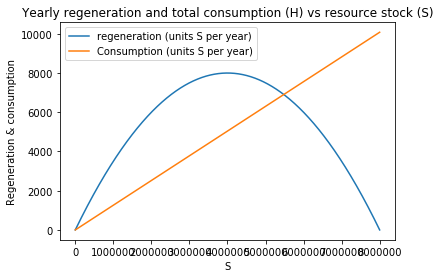

In [2]:
α=42*10**-8 #measure for how much is harvested, given a certain amount of people, given a certain amount of resources
β=1 #how much people like the harvest (over the other thing they can do with their time) (put to 1 in the text for the students)
L=3000

Gs=r*S*(1-(S/K))
H=α*β*L*S

plt.plot(S,Gs,label="regeneration (units S per year)")
plt.plot(S,H,label="Consumption (units S per year)")
plt.xlabel('S')
plt.ylabel('Regeneration & consumption')
plt.title('Yearly regeneration and total consumption (H) vs resource stock (S)')
plt.legend(loc='upper left')
plt.show()


# Dynamic modelling

In the cells below I run the dynamic model, and plot the graphs that are also shown in Brander & Taylor (fig. 2 & fig. 3).

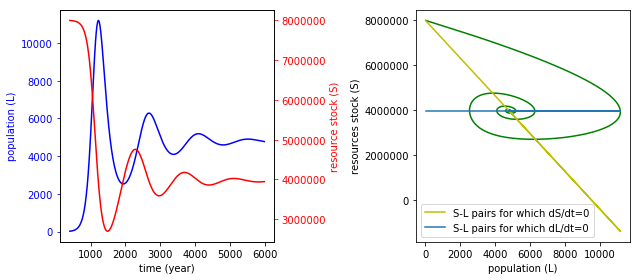

In [4]:
import matplotlib.pyplot as plt
import numpy as np

S=8*10**6
L=20

r=0.004 #regeneration
b=0.02 #basic birth rate
d=0.03 # basic death rate
α=42*10**-8 #techology parameter
K=8*10**6 #carrying capacity
consumptie_respons=0.003

dt=10

S_contain=[]
L_contain=[]
t_contain=[]

t=400

while t < 6000:
    regeneratie = r*S*(1-(S/K))
    consumptie = α*L*S
    dS=(regeneratie-consumptie)
                    
    per_capita=consumptie/L
    consumptievoordeel=consumptie_respons*per_capita
    dL=(((b+consumptievoordeel)-(d-consumptievoordeel))*L)
    
    S=S+dS*dt
    L=L+dL*dt
    
    S_contain.append(S)
    L_contain.append(L)
    t_contain.append(t)
    t=t+dt

# These are the two equilibria: two functions describing respectively the S-L pairs for which dS/dt=0 and dL/dt=0.
# N.B. because in the model we subtract the "consumptievoordeel" from the d and add it to the b, it is effectively double the ϕ of the article.
S_eq=(1-(α*np.asarray(L_contain)/r))*K
L_eq=np.full(len(L_contain),(d-b)/(2*consumptie_respons*α))

#Plotting

ax1=plt.subplot(121)
ax1.plot(t_contain,L_contain,'b')
ax1.set_xlabel('time (year)')
ax1.set_ylabel('population (L)',color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(t_contain,S_contain,'r')
ax2.set_ylabel('resource stock (S)',color='r')
ax2.tick_params('y', colors='r')

plt.subplot(122)
plt.plot(L_contain,S_contain,'g')
plt.plot(L_contain,S_eq,'y',label='S-L pairs for which dS/dt=0')
plt.plot(L_contain,L_eq,label='S-L pairs for which dL/dt=0')
plt.xlabel('population (L)')
plt.ylabel('resources stock (S)')
plt.ticklabel_format(style='plain')
plt.legend(loc='lower left')

plt.rcParams["figure.figsize"] =(9,4) 
plt.tight_layout()
plt.show()
